# <span style="color:red"> Summarizing and visualizing features </span>

In [60]:
!pip install datascience

In [61]:
# Import code libraries or "modules" in Python lingo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import sys
from datascience import *
sns.set_style("whitegrid")
%matplotlib inline

A summary of the methods for Table is [here](http://data8.org/datascience/tables.html) <br>
A tutorial for the datascience module is [here](http://data8.org/datascience/tutorial.html) <br>
A cheatsheet for the datascience module is [here](https://github.com/wstuetzle/STAT180/blob/master/Computing/data8_sp17_midterm_ref_sheet.pdf)

**Note**

If you want to run this notebook on Azure, its easiest to upload the notebook, the file "datascience_extensions.py" (on Canvas) and the file "titanic3-table.csv" (on Canvas) and then replace the next two cells (below) by a single code cell
with the following two lines:

from datascience_extensions import * <br>
titanic = Table.read_table("titanic3-table.csv")

In [62]:
# Import some new methods for class Table
# Add IDS directory to search path

course_dir = "/Users/wxs/Dropbox/IDS/Git-reps/STAT180/"
computing_dir = course_dir + "Computing"

if computing_dir not in sys.path:
    sys.path.append(computing_dir)

from datascience_extensions import *

# Reload the extensions after we make a change
# Importing it again does not work - a module is imported only once
module_name = "datascience_extensions"
importlib.reload(sys.modules[module_name])

<module 'datascience_extensions' from '/Users/wxs/Dropbox/IDS/Git-reps/STAT180/Lectures/datascience_extensions.py'>

Detailed documentation for class Table is [here](http://data8.org/datascience/tables.html)

In [63]:
# Load the titanic table
data_dir = course_dir + "Data/"
titanic_filename = "titanic3-table.csv"
titanic_pathname = data_dir + titanic_filename
titanic = Table.read_table(titanic_pathname)

In [64]:
titanic.take(make_array(0, 1, 2))

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.338,B5,S,2,nan,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,nan,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"


In [65]:
titanic.shape()

[1309, 14]

### <span style="color:blue"> Feature types </span>

We distinguish between

* unordered categorical features ("sex", "embarked")
* ordered categorical features ("pclass")
* numerical features ("age")

For unordered categorical features, values can be either the same or different.
There are no notions of order or distance.

For ordered categorical features, category c1 can be larger, the same, or smaller than category c2.

For numerical features there are notions of order and distance - it makes sense to compute and compare differences between values.

<br>

**Note:** The values of categorical features are often encoded as numbers, but that does not make them into numerical features.


### <span style="color:blue"> Summarizing and visualizing categorical features </span>

We can summarize a categorical feature by the counts or the relative frequencies of the categories.

In [66]:
pclass_count = titanic.group("pclass")
pclass_count

# There were 323 passengers in 1st class....

pclass,count
1,323
2,277
3,709


In [67]:
# pclass_count is a table

pclass_count.labels

('pclass', 'count')

The relative frequencies are the counts divided by the total number of passengers. Let's make a table pclass_dist that has the relative frequencies instead of the counts.

In [68]:
count = pclass_count.column("count")
rel_freq = count / sum(count)
pclass_dist = pclass_count.drop("count").with_column("rel_freq", rel_freq)
pclass_dist

# It would be easy to write a function that takes a table of counts as input 
# and produces a table of relative frequencies. We will do this later.

pclass,rel_freq
1,0.246753
2,0.211612
3,0.541635


The collection of (category, relative frequency) pairs is called the **distribution** of a categorical feature.

The most frequent category is called the **mode** of the distribution.

Let's compute the mode of pclass_dist.

In [69]:
pclass_mode = pclass_dist.sort("rel_freq", descending = True).column("pclass")[0]
pclass_mode

# Again, this calculation could be easily packaged into a function

3.0

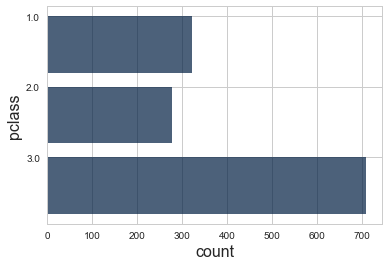

In [70]:
pclass_count.barh("pclass")

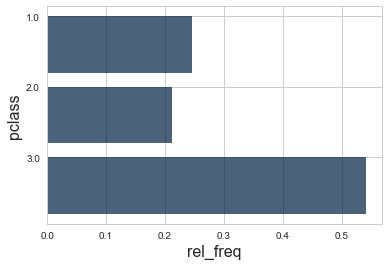

In [71]:
pclass_dist.barh("pclass")

# Looks the same. Only the scale is different.

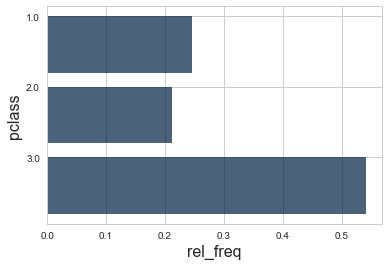

In [72]:
pclass_dist.barh("pclass", "rel_freq")

For unordered categorical variables we would like to sort the categories by count or relative frequency. This could be easily packaged into a function.

### <span style="color:blue"> Summarizing numerical features </span>

We want numerical summaries of

* **location**: what is a "typical" value of the feature
* **scale**: how large is the "scatter" of the values

The most common measures of location are the 
* **mean** - the average of the values
* **median** - the middle most value

In [73]:
foo = make_array(1, 25, 7)
np.mean(foo)  # 33/3

11.0

In [74]:
np.median(foo)

# One of the values is >= (smaller than or equal) 7, one is <= (less than or equal) 7

7.0

In [75]:
foo = make_array(1, 25, 7, 9)
np.median(foo)

# If the number of observations is even, the median is the average of the two middle 
# most values

8.0

Mean and median measure different characteristics of a feature.

<img src="huff-mean-vs-median.png">

The median is **resistant** against outliers - it is a typical value for the bulk of the data. Outliers are common in real data (data entry errors, instrument failure)

In [76]:
foo_with_outlier = make_array(1, 25, 7, 9, 999)
print(np.mean(foo_with_outlier))
print(np.median(foo_with_outlier))

208.2
9.0


**Note**

* Adding a constant c to all the values shifts the mean and the median by c
* Multiplying all the values by a constant c multiplies the mean and the median by c

The most common measure of scale is the **standard deviation**

In [77]:
squared_deviations_from_mean = (foo - np.mean(foo)) ** 2
almost_mean_squared_deviation = sum(squared_deviations_from_mean) / (len(foo) - 1)

# It is common to divide by (len(foo) - 1) rather than len(foo) for arcane 
# technical reasons

sd = (almost_mean_squared_deviation) ** 0.5

# We take the square root so that the measure of scale is in the same
# units as the feature itself

sd

10.246950765959598

In [78]:
# There is a function in numpy that computes the standard deviation

np.std(foo)

8.8741196746494246

In [79]:
# By default, np.std() divides by len(foo)
# If we want to divide by len(foo) - 1 we have to suply an extra argument

np.std(foo, ddof = 1)

10.246950765959598

In [80]:
# The square of the standard deviation is called the variance

np.var(foo, ddof = 1) ** 0.5

10.246950765959598

A measure of scale that naturally goes with the median is the median absolute deviation from the median.

In [81]:
mad = np.median(abs(foo - np.median(foo)))
mad

4.0

In [82]:
# Like the median, the mad is resistant against outliers

print(np.std(foo_with_outlier, ddof = 1))
print(np.median(abs(foo_with_outlier - np.median(foo_with_outlier))))

442.159699656
8.0


**Note**

* Adding a constant c to all the values leaves the standard deviation 
and the mad unchanged
* Multiplying all the values by a constant c multiplies the standard deviation and the mad by abs(c)

### <span style="color:blue"> Visualizing numerical features </span>

Recall: The collection of (category, relative frequency) pairs is called the distribution of a categorical feature.

We can draw the distribution of a numerical feature as a bar chart. Let's try that for the age of the titanic passengers.

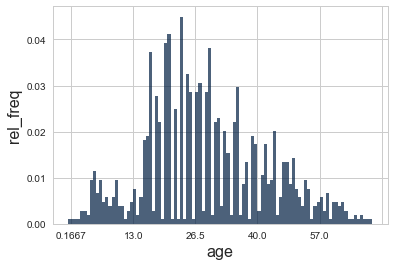

In [83]:
# Make a table with one column that has only the present (non-missing)
# values of age and draw a bar chart

age_count = titanic.select("age").take_complete_rows().group("age")

# Convert to relative frequencies

count = age_count.column("count")
rel_freq = count / sum(count)
age_dist = age_count.drop("count").with_column("rel_freq", rel_freq)
age_dist.bar("age")

We get the general picture but the plot is pretty wiggly. 

For smaller data sets each value of the feature may occur only once, so the bars all would have the same hight. The only information would be in the spacing of the bars.

We need to do some smoothing. 

<br>

**Histograms**



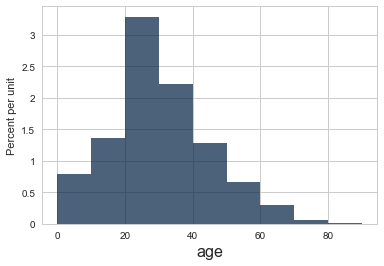

In [84]:
# Let's draw one

age = titanic.select("age").take_complete_rows()
bins = np.arange(0, 100, 10)
age.hist("age", bins = bins)

**How is the histogram computed?**

* Choose bin boundaries, in our case 0, 10,...,90. The bins should cover the span of the data

* Count for how many cases (rows) the value of the feature ("age") falls in each bin. The lower bin boundary is part of the bin, the upper bin boundary is not.

* Draw a bar over each bin with area = relative freqency of cases for which the feature value falls in the bin.

In our example the area of the leftmost bin is approximately 10 * 0.7 = 7, meaning ~7% of the passengers for whom we know the age were less than one year old.

The most frequent age range is [20 years, 30 years) - the bin includes 20 years but does not include 30 years. About 33% of the passenger for whom we know the age were between between 20 and 29 years old.

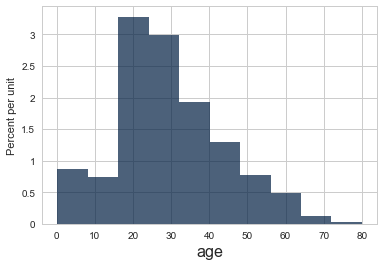

In [85]:
# If we don't provide the bins, the hist function will automatically 
# try to make a sensible choice.

age.hist("age")

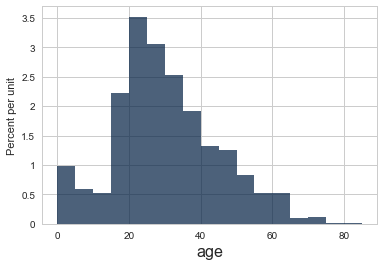

In [86]:
# We may be missing some features of the distribution. Let's try
# a smaller bin width

bins = np.arange(0, 90, 5)
age.hist("age", bins = bins)

# Indeed there seems to ba age peak between 0 and ~4 years

In [87]:
# The age distribution also looks asymmetric.

print(np.mean(age.column("age")))
print(np.median(age.column("age")))

# Suprising: I would have expected a bigger difference.

29.8811345124
28.0


In [88]:
max(age.column("age"))

80.0